<a href="https://colab.research.google.com/github/Aweiss05/Golf-Analytics/blob/main/Masters_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

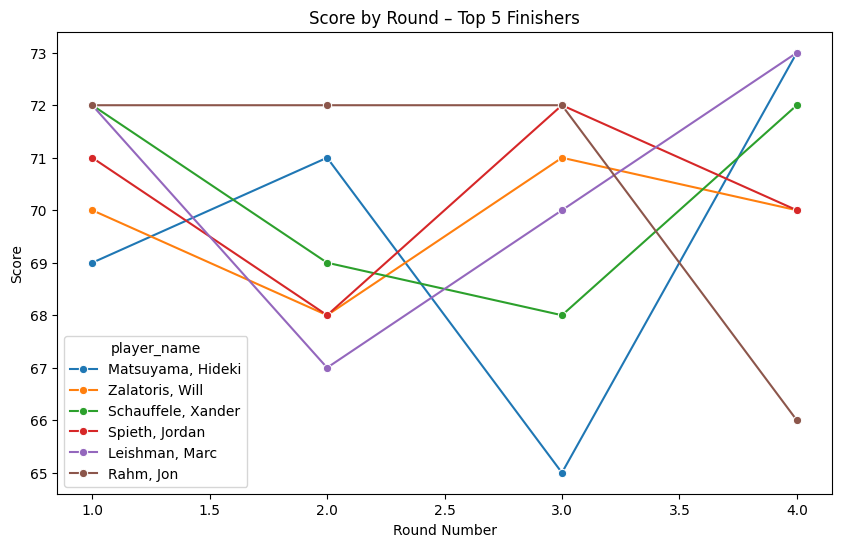

<Figure size 1000x600 with 0 Axes>

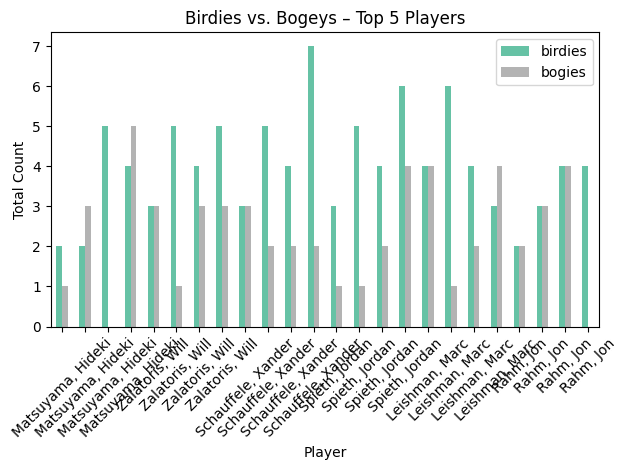

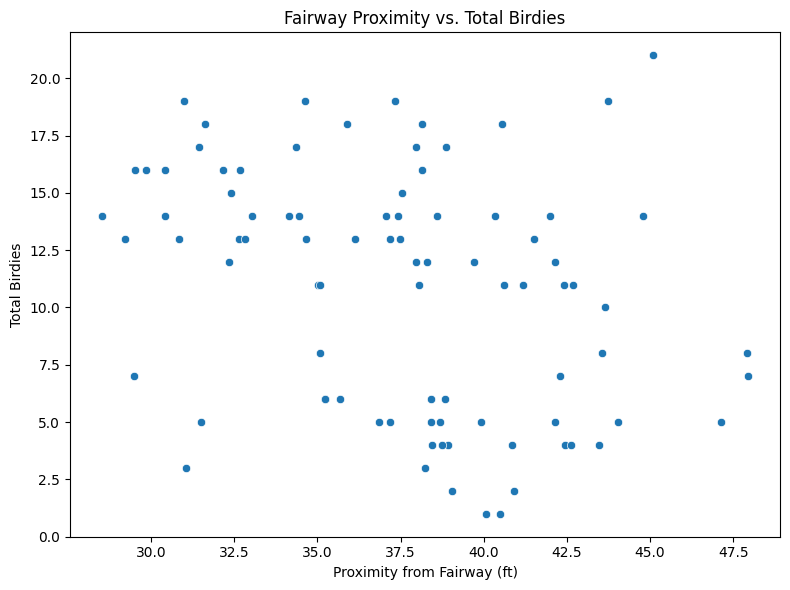

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_2021 = pd.read_csv("raw_pga_536_2021.csv")

# Get top 5 finishers
top5 = df_2021[df_2021['fin_text'].astype(str).isin(['1', '2', 'T3', 'T5'])]['player_name'].unique()

# 1. Line plot: Score by round for top 5
plt.figure(figsize=(10, 6))
top5_rounds = df_2021[df_2021['player_name'].isin(top5)]
sns.lineplot(data=top5_rounds, x='round_num', y='round_score', hue='player_name', marker='o')
plt.title('Score by Round – Top 5 Finishers')
plt.xlabel('Round Number')
plt.ylabel('Score')
plt.show()

# 2. Bar plot: Birdies vs Bogeys for top 5 players
plt.figure(figsize=(10, 6))
bird_bog = df_2021[df_2021['player_name'].isin(top5)][['player_name', 'birdies', 'bogies']].set_index('player_name')
bird_bog.plot(kind='bar', stacked=False, colormap='Set2')
plt.title('Birdies vs. Bogeys – Top 5 Players')
plt.ylabel('Total Count')
plt.xlabel('Player')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Scatter: Fairway Proximity vs. Birdies
plt.figure(figsize=(8, 6))
sns.scatterplot(data=agg_df, x='prox_fw', y='birdies')
plt.title('Fairway Proximity vs. Total Birdies')
plt.xlabel('Proximity from Fairway (ft)')
plt.ylabel('Total Birdies')
plt.tight_layout()
plt.show()


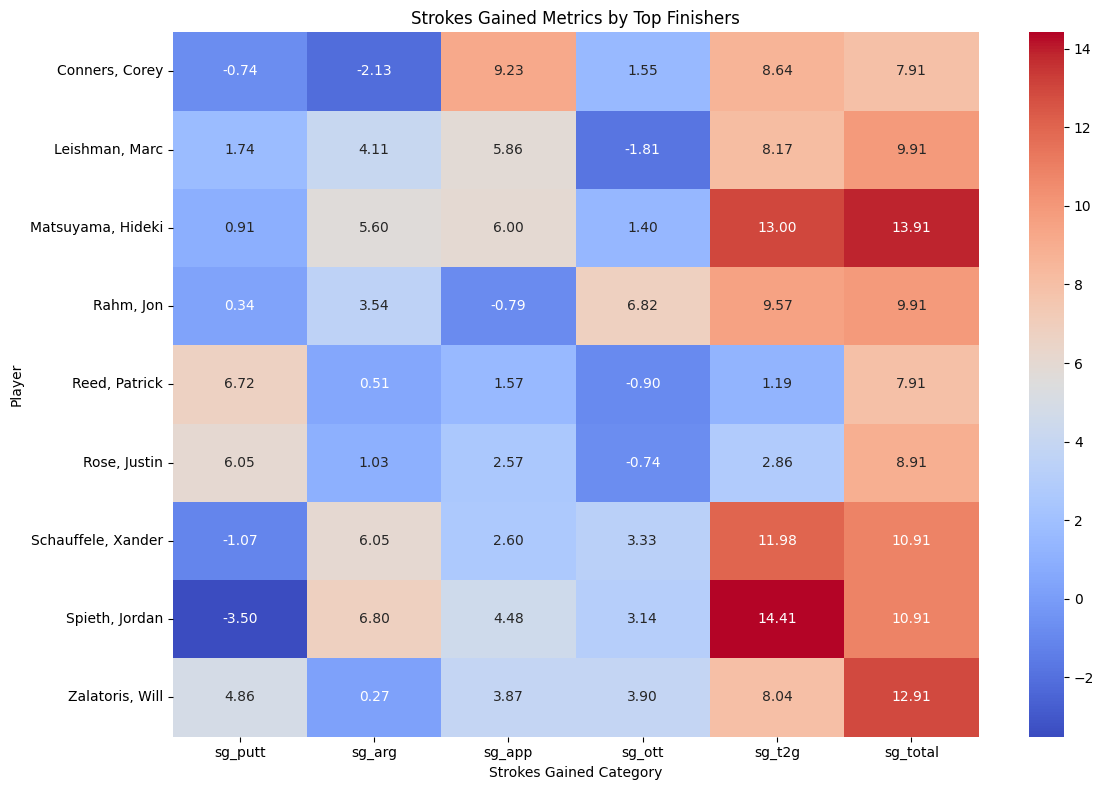

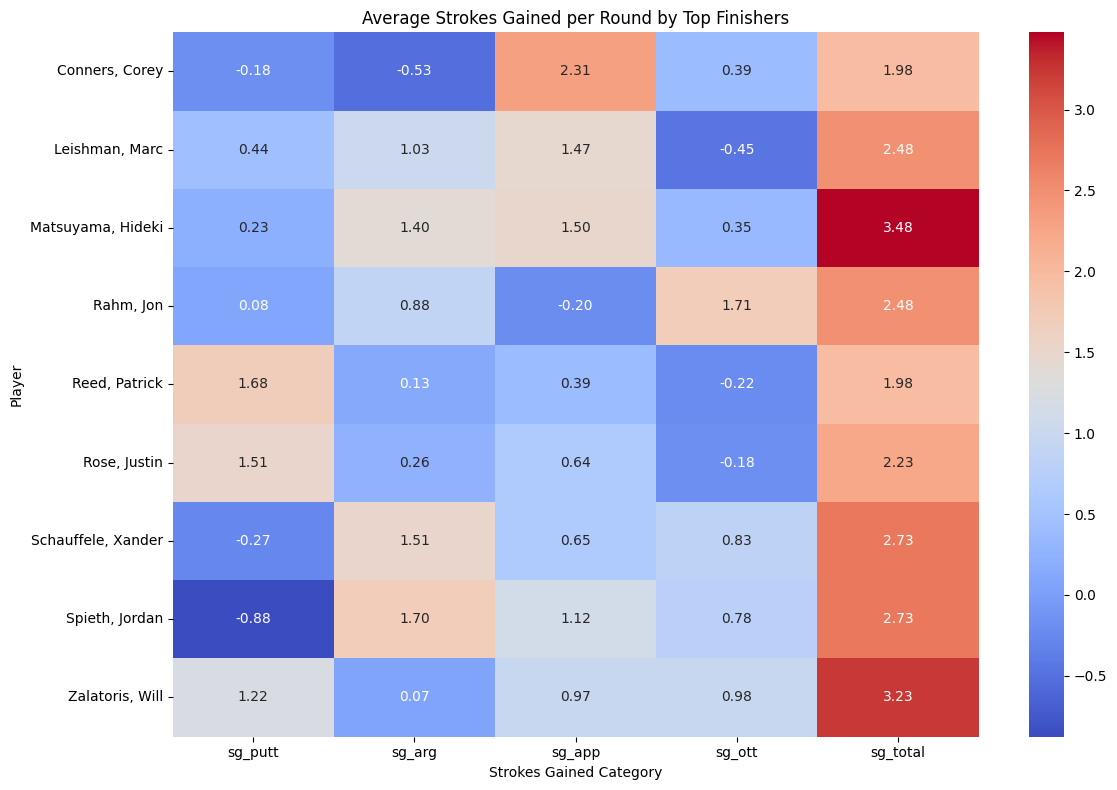

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter relevant strokes gained columns
strokes_gained_df = df_2021[['player_name', 'fin_text', 'sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_total']]

# Identify top finishers
top5 = strokes_gained_df[strokes_gained_df['fin_text'].astype(str).isin(['1', '2', 'T3', 'T5', '7', 'T8'])]['player_name'].unique()

# Filter data for those players
filtered_df = strokes_gained_df[strokes_gained_df['player_name'].isin(top5)]

# Group by player and average strokes gained across all rounds
strokes_gained_avg = filtered_df.groupby('player_name')[['sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_total']].mean()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(strokes_gained_avg, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Average Strokes Gained per Round by Top Finishers')
plt.xlabel('Strokes Gained Category')
plt.ylabel('Player')
plt.tight_layout()
plt.show()
